---
<h1 style="text-align: center;">
CSCI 4521: Applied Machine Learning (Fall 2024)
</h1>

<h1 style="text-align: center;">
Homework 1
</h1>

<h3 style="text-align: center;">
(Due Thu, Sept. 19, 11:59 PM CT)
</h3>

---

### Let's consider the breast cancer dataset `breast_cancer_csci4521.csv`. Each row is a sample and column is a feature (or label). Each sample has a patient ID (first column) and label (second column) with values "M" for malignant and "B" for benign. Write Python code to answer each of the following questions. For any question which asks you to modify the dataset, make sure to use the modified dataset for all subsequent questions.

In [2]:
# Imports for the remainder of the file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from google.colab import drive

# Feature selection libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

# Mount csv file from drive
drive.mount("/content/drive")

Mounted at /content/drive


#### 0. **(2 points)** Load the dataset and print the top 5 rows.

In [3]:
# Read csv file and print head
df = pd.read_csv("/content/drive/My Drive/colab_data/breast_cancer_csci4521.csv", header = None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,NaN,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,NaN,0.6638,0.17300
4,84358402,M,20.29,NaN,135.10,1297.0,NaN,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,NaN,0.2364,0.07678


#### 1. **(3 points)** Count and print the number of samples and features in the dataset.

In [4]:
# Get shape of the dataframe
dim = df.shape

# Number of Samples
print("Number of Samples : ", dim[0])

# Number of features excluding the label, and patient id
print("Number of Features : ", dim[1]-2)

# Remove and store lables to avoid complexity in future cells
labels = df[1]
df.drop([df.columns[1]], axis=1 , inplace=True)

Number of Samples :  569
Number of Features :  30


#### 2. **(10 points)** What are the means, standard deviations, minimum and maximum values of each of the features? Note, only print out these values, nothing else (i.e. do not print the 25%, 50%, 75% percentiles).

In [5]:
# Array to store results
results = []

# Exclude label and feature patient ID, and calculate relevant statistics
for feature in df.columns:
  feature_mean = df[feature].mean()
  feature_std = df[feature].std()
  feature_min = df[feature].min()
  feature_max = df[feature].max()

  # Add data to results
  results.append([feature, feature_mean, feature_std, feature_min, feature_max])

# Add to dataframe for better printing
results_df_for_printing = pd.DataFrame(results, columns=["Feature", "Mean", "Standard Deviation", "Min", "Max"])
print(results_df_for_printing)

    Feature          Mean  Standard Deviation          Min           Max
0         0  3.037183e+07        1.250206e+08  8670.000000  9.113205e+08
1         2  1.415826e+01        3.607291e+00     6.981000  2.811000e+01
2         3  1.928391e+01        4.294333e+00     9.710000  3.928000e+01
3         4  9.196903e+01        2.429898e+01    43.790000  1.885000e+02
4         5  6.548891e+02        3.519141e+02   143.500000  2.501000e+03
5         6  9.656492e-02        1.402176e-02     0.052630  1.634000e-01
6         7  1.043410e-01        5.281276e-02     0.019380  3.454000e-01
7         8  8.851011e-02        7.929406e-02     0.000000  4.268000e-01
8         9  4.891915e-02        3.880284e-02     0.000000  2.012000e-01
9        10  1.811619e-01        2.741428e-02     0.106000  3.040000e-01
10       11  6.279761e-02        7.060363e-03     0.049960  9.744000e-02
11       12  4.034193e-01        2.752475e-01     0.111500  2.873000e+00
12       13  1.201561e+00        5.192831e-01     0

#### 3. **(10 points)** Which features have missing values? For each feature, how are the missing values denoted (i.e., what are the values)?

In [6]:
# Identify columns with missing values (which can be NaN, None)
missing_cols = df.columns[df.isnull().sum() > 0]
missing_representation = {}

for col in missing_cols:
    unique_values = df[col].unique()
    missing_values = [val for val in unique_values if pd.isna(val)]

    # Store the filtered missing values for the column
    missing_representation[col] = missing_values

# Print answer
for col, values in missing_representation.items():
    print(f"Column '{col}' has missing values represented as: {values}")

Column '2' has missing values represented as: [nan]
Column '3' has missing values represented as: [nan]
Column '6' has missing values represented as: [nan]
Column '8' has missing values represented as: [nan]
Column '12' has missing values represented as: [nan]
Column '13' has missing values represented as: [nan]
Column '14' has missing values represented as: [nan]
Column '16' has missing values represented as: [nan]
Column '19' has missing values represented as: [nan]
Column '20' has missing values represented as: [nan]
Column '22' has missing values represented as: [nan]
Column '24' has missing values represented as: [nan]
Column '27' has missing values represented as: [nan]
Column '29' has missing values represented as: [nan]
Column '30' has missing values represented as: [nan]




#### 4. **(5 points)** Replace all missing values with the median value of each feature and print the top 10 rows of the dataframe before and after the replacement.

In [7]:
# Print dataset before replacement with median
print("Before |")
print(df.head(10))

Before |
         0      2      3       4       5        6        7        8        9   \
0    842302  17.99  10.38  122.80  1001.0  0.11840  0.27760      NaN  0.14710   
1    842517  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017   
2  84300903  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790   
3  84348301  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520   
4  84358402  20.29    NaN  135.10  1297.0      NaN  0.13280  0.19800  0.10430   
5    843786  12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780  0.08089   
6    844359  18.25  19.98  119.60  1040.0  0.09463  0.10900  0.11270  0.07400   
7  84458202  13.71  20.83   90.20   577.9  0.11890  0.16450  0.09366  0.05985   
8    844981  13.00  21.82   87.50   519.8      NaN  0.19320      NaN  0.09353   
9  84501001  12.46  24.04   83.97   475.9  0.11860  0.23960      NaN  0.08543   

       10  ...     22     23      24      25      26      27      28      29  \
0  0.2419  ...  25.

In [8]:
# Find and replace all missing values in any columns with the median of the column
missing_cols = df.columns[(df.isna().any())]
df.fillna(df.median(), inplace=True)

# Print all values after replacement
print("After |")
print(df.head(10))

After |
         0      2      3       4       5         6        7        8   \
0    842302  17.99  10.38  122.80  1001.0  0.118400  0.27760  0.06168   
1    842517  20.57  17.77  132.90  1326.0  0.084740  0.07864  0.08690   
2  84300903  19.69  21.25  130.00  1203.0  0.109600  0.15990  0.19740   
3  84348301  11.42  20.38   77.58   386.1  0.142500  0.28390  0.24140   
4  84358402  20.29  18.75  135.10  1297.0  0.095955  0.13280  0.19800   
5    843786  12.45  15.70   82.57   477.1  0.127800  0.17000  0.15780   
6    844359  18.25  19.98  119.60  1040.0  0.094630  0.10900  0.11270   
7  84458202  13.71  20.83   90.20   577.9  0.118900  0.16450  0.09366   
8    844981  13.00  21.82   87.50   519.8  0.095955  0.19320  0.06168   
9  84501001  12.46  24.04   83.97   475.9  0.118600  0.23960  0.06168   

        9       10  ...     22     23      24      25      26      27      28  \
0  0.14710  0.2419  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119   
1  0.07017  0.1812  ...  2

#### 5. **(20 points)** Standardize all the features to have 0 mean and 1 standard deviation. Print out the top 10 rows of the dataframe before and after standardization. Remember, column 0 is the patient ID so do not standardize this but make sure it's not dropped. Plot a histogram of values after standardization for feature 10.

In [9]:
# Print dataset before standardization
print("Before |")
print(df.head(10))

Before |
         0      2      3       4       5         6        7        8   \
0    842302  17.99  10.38  122.80  1001.0  0.118400  0.27760  0.06168   
1    842517  20.57  17.77  132.90  1326.0  0.084740  0.07864  0.08690   
2  84300903  19.69  21.25  130.00  1203.0  0.109600  0.15990  0.19740   
3  84348301  11.42  20.38   77.58   386.1  0.142500  0.28390  0.24140   
4  84358402  20.29  18.75  135.10  1297.0  0.095955  0.13280  0.19800   
5    843786  12.45  15.70   82.57   477.1  0.127800  0.17000  0.15780   
6    844359  18.25  19.98  119.60  1040.0  0.094630  0.10900  0.11270   
7  84458202  13.71  20.83   90.20   577.9  0.118900  0.16450  0.09366   
8    844981  13.00  21.82   87.50   519.8  0.095955  0.19320  0.06168   
9  84501001  12.46  24.04   83.97   475.9  0.118600  0.23960  0.06168   

        9       10  ...     22     23      24      25      26      27      28  \
0  0.14710  0.2419  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119   
1  0.07017  0.1812  ...  

In [10]:
from sklearn.preprocessing import StandardScaler

# Define standard scaler
scaler = StandardScaler()

# Define columns to standardize (exclude id, label)
cols_in_range = range(2, 32)

# Store id
id = df[0]

# Transform data
scaled = scaler.fit_transform(df[cols_in_range])
print(scaled.mean())
print(scaled.std())

# Store data in df after transformation to print
df = pd.DataFrame(scaled, columns=df.columns[1:])
print("After |")
print(df.head(10))

# required for indexing later
df.insert(0, 0, id)

-2.476701392954069e-17
0.983192080250175
After |
         2         3         4         5         6         7         8   \
0  1.202173 -2.254784  1.269934  0.984375  1.654470  3.283515 -0.312539   
1  1.983101 -0.363846  1.685955  1.908708 -0.888374 -0.487072  0.027222   
2  1.716738  0.526609  1.566503  1.558884  0.989674  1.052926  1.515870   
3 -0.786469  0.303996 -0.592687 -0.764464  3.475104  3.402909  2.108634   
4  1.898350 -0.113085  1.776573  1.826229 -0.041137  0.539340  1.523953   
5 -0.474703 -0.893513 -0.387148 -0.505650  2.364593  1.244335  0.982382   
6  1.280872  0.201644  1.138125  1.095295 -0.141234  0.088295  0.374798   
7 -0.093320  0.419141 -0.072867 -0.218965  1.692243  1.140102  0.118293   
8 -0.308226  0.672460 -0.184080 -0.384207 -0.041137  1.684010 -0.312539   
9 -0.471676  1.240509 -0.329482 -0.509063  1.669579  2.563358 -0.312539   

         9         10        11  ...        22        23        24        25  \
0  2.532475  2.217515  2.255747  ...  1.99252

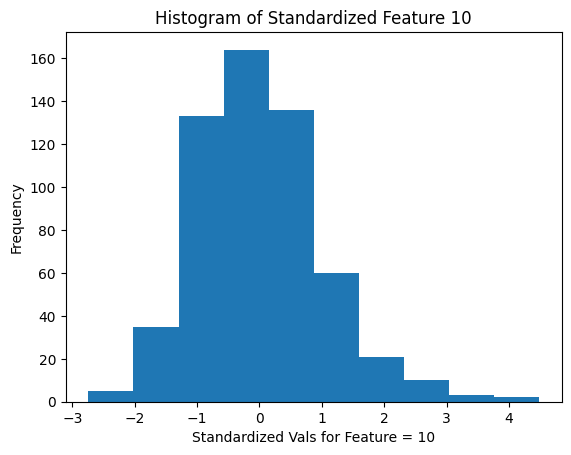

In [11]:
# Plot a histogram of values after standardization for feature 10
plt.hist(df[10])
plt.xlabel("Standardized Vals for Feature = 10")
plt.ylabel("Frequency")
plt.title("Histogram of Standardized Feature 10")
plt.show()

#### 6. **(6 points)** What features have variance $< 0.1$? Remove any such features from the dataset.

In [12]:
columns = df.columns
remove = [col for col in columns if df[col].var() < 0.1]
df.drop(columns=remove, inplace=True)

print("Feature removed ", remove)

Feature removed  [16]


#### 7. **(2 points)** Which samples (as indicated by row number) are duplicate samples?


In [13]:
dups = df.duplicated()
if dups.any():
  print("Feature ", df[dups], " is duplicated.")
else :
  print("No duplicates detected")


No duplicates detected


#### 8. **(17 points)** Use the standard deviation method to remove outliers. Apply the method to each feature individually and choose the data points which are an outlier in any of the features to remove. You can choose the lower and upper thresholds. Explain how you decided on the thresholds and what were the outlier samples removed from the dataset. (Don't forget the labels and patient IDs!)


Based on the link [here](https://medium.com/analytics-vidhya/removing-outliers-understanding-how-and-what-behind-the-magic-18a78ab480ff) I am making the assumption that to remove outliers you need to remove data beyond 3 standard deviations of the mean. The following is code to accomplish that.

In [14]:
threshold = 3
rows_to_remove = set()
for feature in df.columns[2:]:
  mean = df[feature].mean()
  std = df[feature].std()
  lower_bound = mean - threshold * std
  upper_bound = mean + threshold * std
  test_ft = df[feature]
  outliers = df[(test_ft < lower_bound) | (test_ft > upper_bound)].index
  rows_to_remove.update(outliers)

df.drop(index=list(rows_to_remove), axis=0, inplace=True)
labels.drop(index=list(rows_to_remove), axis=0, inplace=True)
id.drop(index=list(rows_to_remove), axis=0, inplace=True)

print(len(df), len(labels), len(id))
print(len(rows_to_remove))

493 493 493
76


#### 9. **(20 points)** Select a subset of the features using the ANOVA test. Plot a histogram of all the ANOVA scores and decide which features to keep. Print which features those are.

In [15]:
def select_features(
    X: np.ndarray,
    y: np.ndarray,
    num_features: int,
    score_func: str
) -> tuple[np.ndarray, sklearn.feature_selection._univariate_selection.SelectKBest]:
    if score_func == "anova":
        # measure means between features and labels
        fs = SelectKBest(score_func = f_classif, k = num_features)
    else:
        raise ValueError(f"Unknown score function: {score_func}. Available functions: chi2, anova.")
    fs.fit(X, y)
    X_fs = fs.transform(X)
    return X_fs, fs

After feature selection:
Num samples: 493
Num features: 7

ANOVA feature scores:
Feature 0: 421.0168113889116
Feature 1: 84.03256478087066
Feature 2: 655.1673892724932
Feature 3: 627.3866076660361
Feature 4: 46.63586207512292
Feature 5: 279.5573266960414
Feature 6: 455.5639418558197
Feature 7: 839.1291942033781
Feature 8: 47.14257141169063
Feature 9: 2.5198039895740005
Feature 10: 293.99771425388263
Feature 11: 0.061069574262044624
Feature 12: 248.7384231709152
Feature 13: 476.3778056047059
Feature 14: 46.48917522973792
Feature 15: 81.4459762987031
Feature 16: 112.53856221157275
Feature 17: 6.748478031973779
Feature 18: 6.459462513658339
Feature 19: 761.92217383664
Feature 20: 115.48810526469221
Feature 21: 694.5617163878438
Feature 22: 819.5997274620557
Feature 23: 93.32200871853814
Feature 24: 247.76174664715992
Feature 25: 447.03054503483315
Feature 26: 575.0444119980083
Feature 27: 88.64943025286296
Feature 28: 54.96485099609761


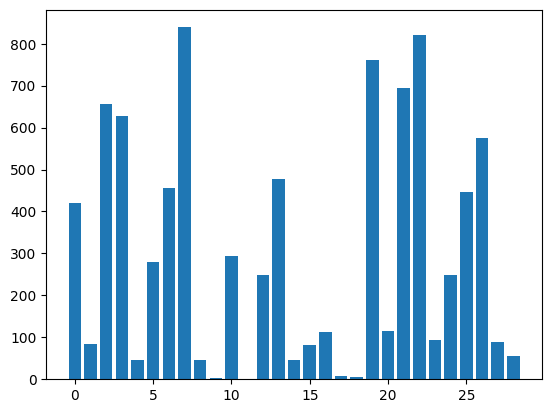

In [16]:
# Drop ad store id, since we dont want it as a feature
id = df[0]
df.drop(0, axis=1, inplace=True)

X = df
y = labels

num_features_to_select = 7

# first compute all features scores
X_feat, fs = select_features(X, y, num_features_to_select, "anova")

num_samples, num_features = X_feat.shape

print("After feature selection:")
print(f"Num samples: {num_samples}")
print(f"Num features: {num_features}")
print("")


# what are scores for the features
print("ANOVA feature scores:")
for i in range(len(fs.scores_)):
    print(f"Feature {i}: {fs.scores_[i]}")

# plot the scores
# Note that the axis on the histogram starts from 0, because we've removed label and ID
# for analysis. The actual feature being plotted is indexed in the df as index+2
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

#### 10. **(5 points)** After all the above, how many samples and features does the final dataset have?

In [17]:
# Get the indices of the relevant features
selected_feature_indices = fs.get_support(indices=True)

# Modify the original dataframe to keep only the selected features
df = df.iloc[:, selected_feature_indices]

# Note that the number 7 can be modified at will based on how many features we want to select.
# As mentioned in office hours, I chose a number based on values above some threshold arbirtarily
print(df.shape[0])
print(df.shape[1])

493
7


---